In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

Label for the image: 9


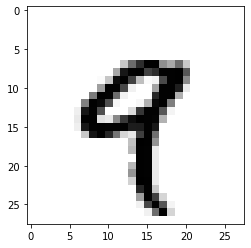

In [5]:
img_index = 4
plt.imshow(x_train[img_index,:,:], cmap = 'gray_r') # "gray_r" represents the image to be inveresed
print("Label for the image: " + str(y_train[img_index]))
single_img = x_train[0,:,:]

In [6]:
from keras.utils.np_utils import to_categorical # To perform the one hot encoding

In [7]:
y_cat_train = to_categorical(y_train, 10) # arg2 - #classes (0-9)
y_cat_test = to_categorical(y_test, 10)

In [8]:
print("One hot encoded output: " + str(y_cat_train[0]))
print("Actual output: " + str(y_train[0]))

One hot encoded output: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Actual output: 5


## Pre-processing the x data

### 1. Normalization

Max value: 255


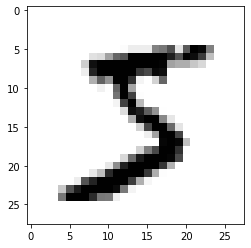

In [9]:
import numpy as np

# Image without normallization
plt.imshow(single_img, cmap = 'gray_r')
print("Max value: " + str(np.max(single_img)))

Max value after normalization: 1.0


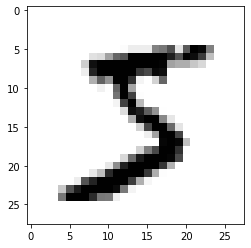

In [10]:
# Divide the entire training image dataset
# to perform the normalization
x_train = x_train / x_train.max()
single_img_norm = x_train[0,:,:]
plt.imshow(single_img_norm, cmap = 'gray_r')
print("Max value after normalization: " + str(np.max(single_img_norm)))

### Reshape the data

In [11]:
# Get current shape of the training set
x_train.shape

(60000, 28, 28)

In [12]:
# Include the color channels
x_train = x_train.reshape(60000, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

## Build the model

In [15]:
# Import the libraries required for the model and the layer addition
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [18]:
# Create a skeleton of the model
model = Sequential()

# Add a CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28, 28, 1), activation = "relu"))

# Add a POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

# Convert the 2D to 1D layer for the softmax classifier
model.add(Flatten())

# FULLY CONNECTED DENSE LAYER
model.add(Dense(128, activation="relu"))

# Add the final DENSE SOFTMAX LAYER for classification
model.add(Dense(10, activation="softmax"))

model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ['accuracy'])

# Get the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Fit the model based upon the training set
model.fit(x_train, y_cat_train, epochs = 2)

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1372 - accuracy: 0.9581
Epoch 2/2
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0476 - accuracy: 0.9856


## Evaluate the Model

In [20]:
# Get the available metrics
print(model.metrics_names)


['loss', 'accuracy']


In [23]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 123.1149 - accuracy: 0.8988


[123.11493682861328, 0.8988000154495239]

In [25]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)
print(y_cat_test.shape)
print(predictions[0])
print(classification_report(y_test, predictions))

(10000, 10)
7
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       980
           1       0.99      0.97      0.98      1135
           2       0.97      0.93      0.95      1032
           3       0.99      0.76      0.86      1010
           4       0.99      0.96      0.97       982
           5       1.00      0.68      0.81       892
           6       0.97      0.96      0.96       958
           7       0.97      0.94      0.96      1028
           8       0.54      0.99      0.70       974
           9       1.00      0.78      0.87      1009

    accuracy                           0.90     10000
   macro avg       0.93      0.90      0.90     10000
weighted avg       0.94      0.90      0.90     10000

